In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Texas School Cheating

### Read in the data (cfy03e3.csv and cfy04e4.csv)
When you're reading the data 
- set the 'campus' column to be the index 
- make sure to add suffix to each column based on the grade (3rd or 4th)

In [7]:
df = pd.read_csv('sources/cfy03e3.csv')

In [12]:
df.head()

,DISTRICT,MONTH,YEAR,GRADE,REGION,CAMPUS,DNAME,CNAME,STATE,a_docs,...,M_obj2_RI,M_obj3_NI,M_obj3_RI,M_obj4_NI,M_obj4_RI,M_obj5_NI,M_obj5_RI,M_obj6_NI,M_obj6_RI,a_not_n
0,1902,3,3,3,7,1902103,CAYUGA ISD,CAYUGA EL,1,41,...,91.0,5.2,87.0,5.0,84.0,3.7,92.0,6.6,83.0,NaN
1,1903,4,3,3,7,1903101,ELKHART ISD,ELKHART EL,1,73,...,77.0,5.0,83.0,4.3,72.0,3.0,74.0,4.8,60.0,NaN
2,1904,4,3,3,7,1904102,FRANKSTON ISD,FRANKSTON EL,1,70,...,77.0,4.9,82.0,4.8,79.0,3.6,90.0,5.5,69.0,NaN
3,1906,4,3,3,7,1906102,NECHES ISD,NECHES EL,1,17,...,76.0,5.6,93.0,4.8,79.0,3.3,83.0,5.2,65.0,NaN
4,1907,4,3,3,7,1907110,PALESTINE ISD,STORY EL,1,262,...,69.0,4.7,78.0,4.3,72.0,3.2,81.0,4.4,56.0,NaN


In [5]:
df = pd.read_csv('sources/cfy03e3.csv').set_index('CAMPUS')

In [6]:
df3 = pd.read_csv('sources/cfy03e3.csv').set_index('CAMPUS').add_suffix('_third')
df3.head()

,DISTRICT_third,MONTH_third,YEAR_third,GRADE_third,REGION_third,DNAME_third,CNAME_third,STATE_third,a_docs_third,a_tst_n_third,...,M_obj2_RI_third,M_obj3_NI_third,M_obj3_RI_third,M_obj4_NI_third,M_obj4_RI_third,M_obj5_NI_third,M_obj5_RI_third,M_obj6_NI_third,M_obj6_RI_third,a_not_n_third
CAMPUS,,,,,,,,,,,,,,,,,,,,,
1902103,1902,3,3,3,7,CAYUGA ISD,CAYUGA EL,1,41,36,...,91.0,5.2,87.0,5.0,84.0,3.7,92.0,6.6,83.0,NaN
1903101,1903,4,3,3,7,ELKHART ISD,ELKHART EL,1,73,62,...,77.0,5.0,83.0,4.3,72.0,3.0,74.0,4.8,60.0,NaN
1904102,1904,4,3,3,7,FRANKSTON ISD,FRANKSTON EL,1,70,64,...,77.0,4.9,82.0,4.8,79.0,3.6,90.0,5.5,69.0,NaN
1906102,1906,4,3,3,7,NECHES ISD,NECHES EL,1,17,14,...,76.0,5.6,93.0,4.8,79.0,3.3,83.0,5.2,65.0,NaN
1907110,1907,4,3,3,7,PALESTINE ISD,STORY EL,1,262,246,...,69.0,4.7,78.0,4.3,72.0,3.2,81.0,4.4,56.0,NaN


In [7]:
df4 = pd.read_csv('sources/cfy04e4.csv').set_index('CAMPUS').add_suffix('_fourth')
df4.head()

,DISTRICT_fourth,MONTH_fourth,YEAR_fourth,GRADE_fourth,REGION_fourth,DNAME_fourth,CNAME_fourth,STATE_fourth,a_docs_fourth,a_tst_n_fourth,...,a_wc4_eco1_R_fourth,a_wc4_eco2_R_fourth,a_wc4_eco9_R_fourth,a_wc4_voce_R_fourth,a_wc4_vocs_R_fourth,a_wc4_vocp_R_fourth,a_wc4_ecoy_R_fourth,a_wc4_econ_R_fourth,a_wc4_ecov_R_fourth,a_not_n_fourth
CAMPUS,,,,,,,,,,,,,,,,,,,,,
1902103,1902,4,4,4,7,CAYUGA ISD,CAYUGA EL,1,42,38,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1903101,1903,4,4,4,7,ELKHART ISD,ELKHART EL,1,67,67,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1904102,1904,4,4,4,7,FRANKSTON ISD,FRANKSTON EL,1,71,65,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,6.0,NaN,NaN
1906102,1906,4,4,4,7,NECHES ISD,NECHES EL,1,17,15,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1907110,1907,4,4,4,7,PALESTINE ISD,STORY EL,1,234,213,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


## Join the datasets above horizontally

In [8]:
merge_df = df3.join(df4)

In [9]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779 entries, 1902103 to 254902101
Columns: 3778 entries, DISTRICT_third to a_not_n_fourth
dtypes: float64(3573), int64(201), object(4)
memory usage: 109.0+ MB


## Drop rows with empty campus names ('CNAME') for both grades

In [10]:
merge_df = merge_df.dropna(subset=['CNAME_third','CNAME_fourth'])

## Plot the resulting DF using regplot in seaborn
for x use 'r_all_rs_third'
for y use 'r_all_rs_fourth'

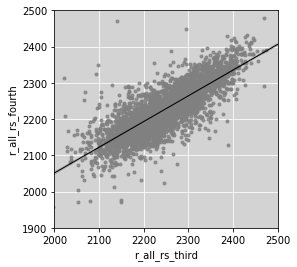

In [11]:
fig, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(2000,2500)
ax.set_ylim(1900,2500)
ax.set_facecolor('lightgrey')
ax.grid(True,color='white')
ax.set_axisbelow(True)

sns.regplot('r_all_rs_third','r_all_rs_fourth',data=merge_df,
            marker='.',
            line_kws={'color':'black', 'linewidth':1},
            scatter_kws={'color':'grey'})

## Based on the graph above find the name of the outlier school

In [12]:
merge_df[(merge_df.r_all_rs_third < 2200) & (merge_df.r_all_rs_fourth > 2400)]

,DISTRICT_third,MONTH_third,YEAR_third,GRADE_third,REGION_third,DNAME_third,CNAME_third,STATE_third,a_docs_third,a_tst_n_third,...,a_wc4_eco1_R_fourth,a_wc4_eco2_R_fourth,a_wc4_eco9_R_fourth,a_wc4_voce_R_fourth,a_wc4_vocs_R_fourth,a_wc4_vocp_R_fourth,a_wc4_ecoy_R_fourth,a_wc4_econ_R_fourth,a_wc4_ecov_R_fourth,a_not_n_fourth
CAMPUS,,,,,,,,,,,,,,,,,,,,,
57905115,57905,4,3,3,10,DALLAS ISD,HARRELL BUDD EL,1,107,103,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


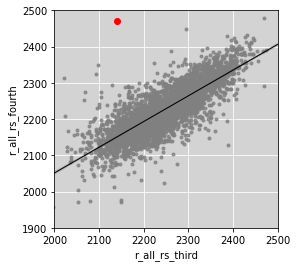

In [17]:
fig, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(2000,2500)
ax.set_ylim(1900,2500)
ax.set_facecolor('lightgrey')
ax.grid(True,color='white')
ax.set_axisbelow(True)

sns.regplot('r_all_rs_third','r_all_rs_fourth',data=merge_df,
            marker='.',
            line_kws={'color':'black', 'linewidth':1},
            scatter_kws={'color':'grey'})

harr = merge_df.loc[57905115]
plt.plot(harr.r_all_rs_third, harr.r_all_rs_fourth,'ro')

<span style="color:green">
    To learn more about 2 character color and plot-type codes like 'ro' see here:
    https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    </span>



## Try to predict 4th graders' scores based on their third grade performance using a linear regression
!!! Make sure both score columns have no null values

In [19]:
merge_df = merge_df[merge_df.r_all_rs_third.notnull() & merge_df.r_all_rs_fourth.notnull()]

In [20]:
### Describe the model
### statsmodels, give linear regession on X & Y
### sm.OLS(Y,X)
mod = sm.OLS(merge_df.r_all_rs_fourth, merge_df.r_all_rs_third)

### Fit
res = mod.fit()


### With an intercept (?)
# X = merged[['r_all_rs_third']]
# X = sm.add_constant(X)
# mod = sm.OLS(merged.r_all_rs_fourth, X)
# res = mod.fit()

## Print regression results using the .summary () method

In [21]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        r_all_rs_fourth   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.067e+06
Date:                Sat, 13 Jul 2019   Prob (F-statistic):                        0.00
Time:                        15:47:00   Log-Likelihood:                         -18403.
No. Observations:                3501   AIC:                                  3.681e+04
Df Residuals:                    3500   BIC:                                  3.681e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
r_all_rs_third     0.9905      0.000   2840.184      0.000       0.990       0.991
==============================================================================
Omnibus:                      363.602   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1604.827
Skew:                           0.420   Prob(JB):                         0.00
Kurtosis:                       6.209   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:green">
    Coefficient (COEF) shows that 4th grade scores are about 99% as high as 3rd graders
    </span>

In [22]:
res.params

r_all_rs_third    0.990451
dtype: float64

## If we would to predict the score of the 4th graders at HARRELL BUDD EL based on the results of 3rd graders?

In [ ]:
res.predict([2140.0])

## How far is HARRELL BUDD EL score from the prediction

In [23]:
# Finding standard deviation
# Take the square root of (square the residuals and take the mean)
stddev_harr = np.sqrt(np.mean(res.resid**2))
stddev_harr

46.41737610431789

## Sort by how many standard deviations aways they are to find the CHEATERS

In [24]:
# Compute the standard deviation of the whole data set
stddev_all = np.sqrt(res.mse_resid)

In [25]:
# Calculate standard deviation of the residuals individually
# How spread out the points are around the line
merge_df['std_dev'] = res.resid / stddev_all

In [26]:
# Select only these columns ['CNAME_fourth', 'r_all_rs_fourth', 'r_all_rs_third', 'std_dev']
important_cols = merge_df[['CNAME_fourth', 'r_all_rs_fourth', 'r_all_rs_third', 'std_dev']]

In [28]:
# Then we'll sort by the standard deviation
# We want the top and the bottom, right? So we'll abs-value it?
std_dev_order = important_cols.std_dev.abs().sort_values(ascending=False).index
important_cols.reindex(std_dev_order)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,std_dev
CAMPUS,,,,
57905115,HARRELL BUDD EL,2470.0,2140.0,7.548553
123803101,TEKOA ACADEMY O,2313.0,2021.0,6.705535
15803101,HIGGS/CARTER/KI,2349.0,2097.0,5.859543
101912172,HENDERSON N EL,2324.0,2093.0,5.406369
139908101,ROXTON EL,2130.0,2388.0,-5.066298
57825001,PINNACLE SCHOOL,2274.0,2068.0,4.862712
101823101,CHILDREN FIRST,2252.0,2066.0,4.431489
47905001,SIDNEY SCHOOL,2208.0,2024.0,4.379769
105802041,SAN MARCOS PREP,2025.0,2245.0,-4.277169
